<a href="https://colab.research.google.com/github/MoP16/ml-april-2025-b-eportfolio/blob/main/Object_Recognition_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print("--- Initial Data Shapes ---")
print("x_train_full shape:", x_train_full.shape)
print("y_train_full shape:", y_train_full.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
--- Initial Data Shapes ---
x_train_full shape: (50000, 32, 32, 3)
y_train_full shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


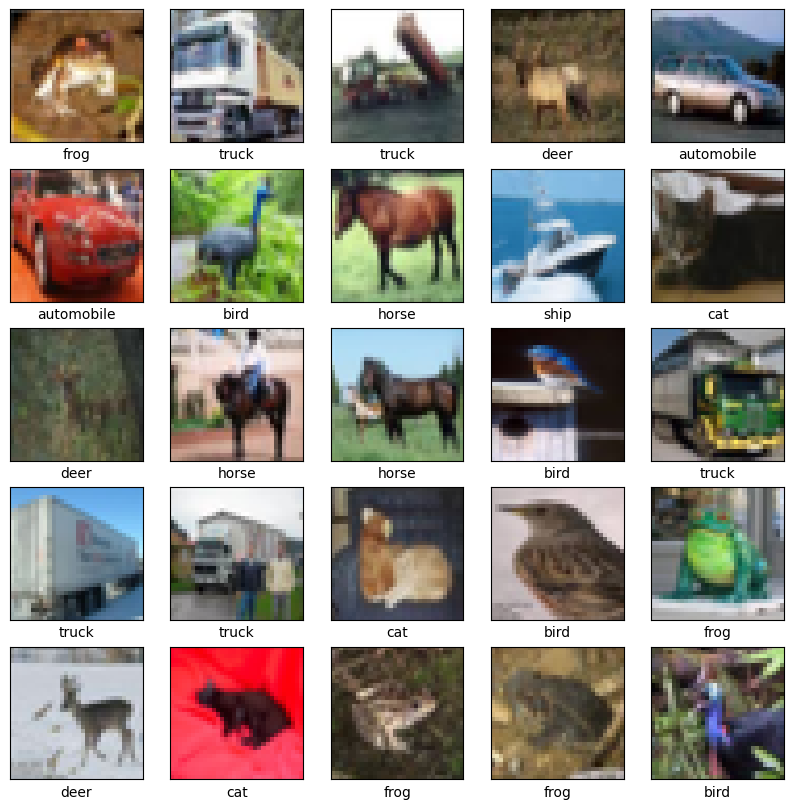

--- Data Shapes After Splitting ---
Training data shape: (45000, 32, 32, 3)
Training labels shape: (45000, 1)
Validation data shape: (5000, 32, 32, 3)
Validation labels shape: (5000, 1)


In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_full[i])
    plt.xlabel(class_names[y_train_full[i][0]])
plt.show()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.1, random_state=42
)

print("--- Data Shapes After Splitting ---")
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

y_train_cat = to_categorical(y_train, num_classes=10)
y_val_cat = to_categorical(y_val, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Dropout(0.25),

        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model
cnn_model = create_cnn_model()
cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = cnn_model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                        epochs=25,
                        validation_data=(x_val, y_val_cat))

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.2983 - loss: 1.8815 - val_accuracy: 0.5334 - val_loss: 1.2778
Epoch 2/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.5042 - loss: 1.3631 - val_accuracy: 0.5966 - val_loss: 1.1197
Epoch 3/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.5662 - loss: 1.2160 - val_accuracy: 0.6176 - val_loss: 1.0415
Epoch 4/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.6067 - loss: 1.1069 - val_accuracy: 0.6372 - val_loss: 1.0083
Epoch 5/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 41ms/step - accuracy: 0.6279 - loss: 1.0454 - val_accuracy: 0.6640 - val_loss: 0.9490
Epoch 6/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.6503 - loss: 0.9961 - val_accuracy: 0.7006 - val_loss: 0.8512
Epoch 7/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 42ms/step - accuracy: 0.6624 - loss: 0.9599 - val_accuracy: 0.7104 - val_loss: 0.8297
Epoch 8/25
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 42ms/step - accuracy: 0.6742 - loss: 0.9229 - val_accurac

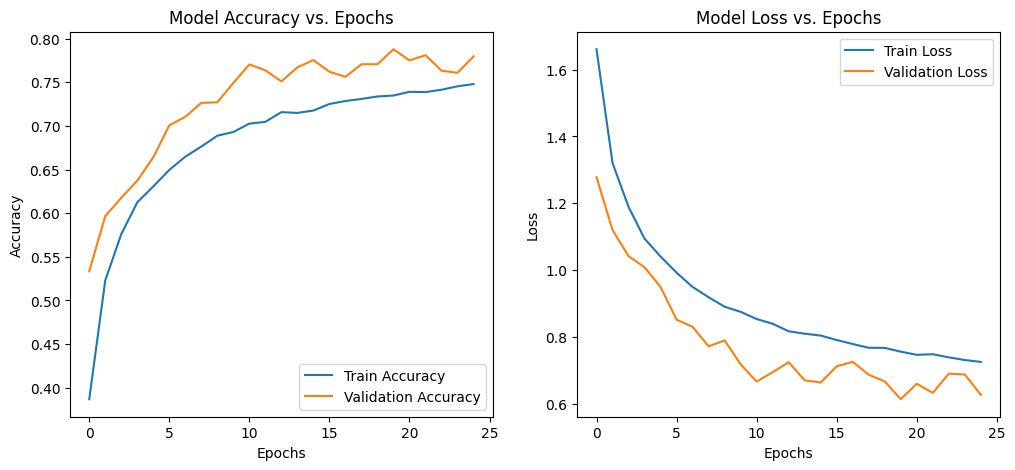


--- Evaluating on Test Data ---
Test Accuracy: 77.77%
Test Loss: 0.6493
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

--- Classification Report ---
              precision    recall  f1-score   support

    airplane       0.86      0.78      0.82      1000
  automobile       0.94      0.86      0.90      1000
        bird       0.83      0.57      0.67      1000
         cat       0.66      0.58      0.62      1000
        deer       0.71      0.75      0.73      1000
         dog       0.78      0.59      0.67      1000
        frog       0.62      0.95      0.75      1000
       horse       0.80      0.88      0.84      1000
        ship       0.90      0.89      0.89      1000
       truck       0.78      0.94      0.85      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000


--- Confusion Matrix ---


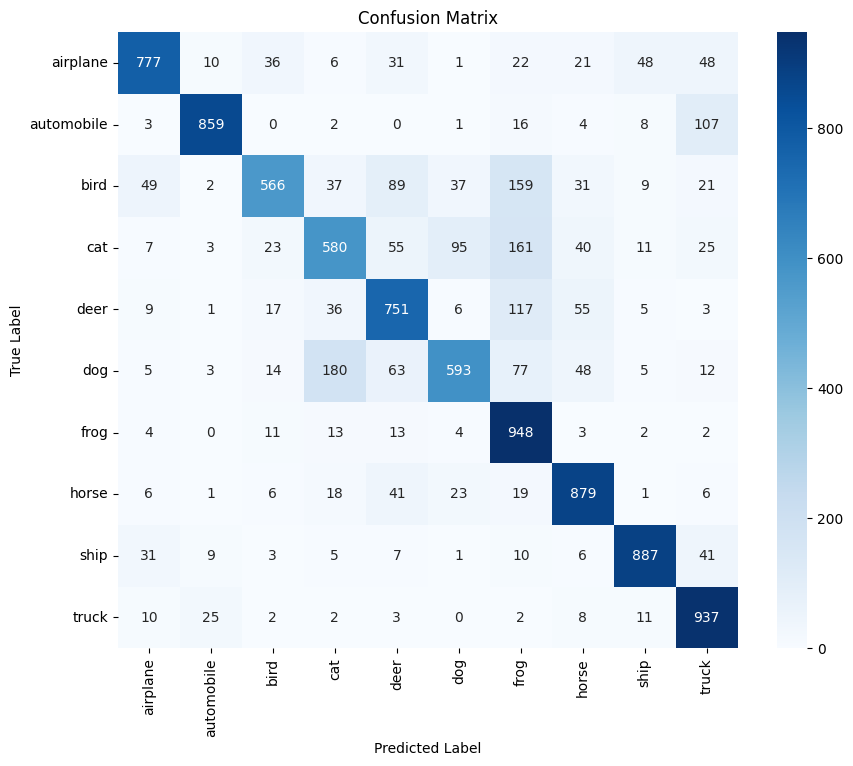

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns # Import seaborn for heatmap visualization

# --- 1. Plot Training History ---
# This shows how your model learned over the epochs
history_df = pd.DataFrame(history.history)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Model Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


# --- 2. Evaluate on the Test Set ---
print("\n--- Evaluating on Test Data ---")
test_loss, test_accuracy = cnn_model.evaluate(x_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


# --- 3. Generate Classification Report and Confusion Matrix ---
# Get model predictions
y_pred_probs = cnn_model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = y_test.ravel()

# Classification Report (Precision, Recall, F1-Score)
print("\n--- Classification Report ---")
print(classification_report(y_test_labels, y_pred, target_names=class_names))

# Confusion Matrix
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test_labels, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# --- 1. Load the Pre-trained Base Model ---
base_model = MobileNetV2(weights='imagenet', include_top=False,
                         input_shape=(32, 32, 3))

# --- 2. Freeze the Base Model ---
base_model.trainable = False

# --- 3. Create the New Model ---
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# --- 4. Print the Model Summary ---
transfer_model.summary()

/tmp/ipython-input-7-3501892380.py:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False,


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# --- 1. Compile the Model ---
transfer_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- 2. Train the Model ---
transfer_history = transfer_model.fit(x_train, y_train_cat,
                                      epochs=10,
                                      validation_data=(x_val, y_val_cat))

Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.1832 - loss: 2.2062 - val_accuracy: 0.3032 - val_loss: 2.0294
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 30s 7ms/step - accuracy: 0.2379 - loss: 2.0851 - val_accuracy: 0.3114 - val_loss: 1.9892
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2489 - loss: 2.0651 - val_accuracy: 0.3120 - val_loss: 1.9708
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.2469 - loss: 2.0542 - val_accuracy: 0.3154 - val_loss: 1.9595
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2518 - loss: 2.0540 - val_accuracy: 0.3092 - val_loss: 1.9569
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2511 - loss: 2.0468 - val_accuracy: 0.3142 - val_loss: 1.9510
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2547 - loss: 2.0432 - val_accuracy: 0.3176 - val_loss: 1.9485
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2556 - loss: 

In [ ]:
# --- 1. Unfreeze the Base Model ---
base_model.trainable = True

# --- 2. Re-compile the Model with a Low Learning Rate ---
from tensorflow.keras.optimizers import Adam

transfer_model.compile(optimizer=Adam(learning_rate=1e-5), # Lower learning rate
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# --- 3. Continue Training (Fine-Tuning) ---
fine_tune_history = transfer_model.fit(x_train, y_train_cat,
                                       epochs=20,
                                       initial_epoch=transfer_history.epoch[-1],
                                       validation_data=(x_val, y_val_cat))

Epoch 10/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 93s 33ms/step - accuracy: 0.1356 - loss: 13.7578 - val_accuracy: 0.1366 - val_loss: 4.1613
Epoch 11/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.1897 - loss: 6.4212 - val_accuracy: 0.2316 - val_loss: 2.3725
Epoch 12/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.2133 - loss: 3.3846 - val_accuracy: 0.2624 - val_loss: 2.2077
Epoch 13/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.2390 - loss: 2.5299 - val_accuracy: 0.3098 - val_loss: 2.0214
Epoch 14/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.2741 - loss: 2.2611 - val_accuracy: 0.3524 - val_loss: 1.9003
Epoch 15/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.3089 - loss: 2.1211 - val_accuracy: 0.3910 - val_loss: 1.7707
Epoch 16/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3437 - loss: 1.9864 - val_accuracy: 0.4190 - val_loss: 1.6965
Epoch 17/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: